In [ ]:
import yfinance as yf
import pandas as pd

data = yf.download("AAPL", period = "5y")
data.to_csv("aapl_data.csv")

print(data.head())
print(f"LEN : {len(data)}")

C:\Users\Mohamed Yaseen\AppData\Local\Temp\ipykernel_27284\3510334981.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", period = "5y")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2020-11-02  105.802505  107.660400  104.392068  106.133233  122866900
2020-11-03  107.426941  108.448290  105.763595  106.668222  107624400
2020-11-04  111.813911  112.436450  109.284847  111.026012  138235500
2020-11-05  115.782593  116.356500  113.681526  114.732056  126387100
2020-11-06  115.651062  116.147999  113.156603  115.290533  114457900
LEN : 1256


In [ ]:
import os
print(os.getcwd())

C:\Users\Mohamed Yaseen\Projects\Stock_Prediction


C:\Users\Mohamed Yaseen\AppData\Local\Temp\ipykernel_20256\154046028.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', period='5y')
[*********************100%***********************]  1 of 1 completed


Chart saved


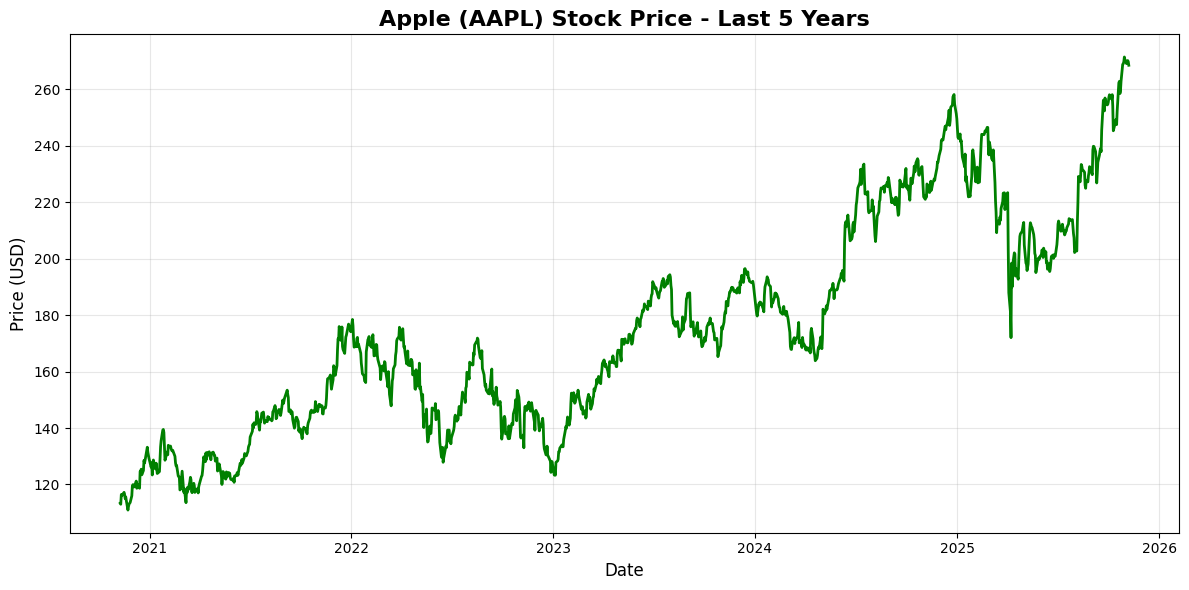

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd 

data = yf.download('AAPL', period='5y')

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], color = 'green', linewidth=2)
plt.title("Apple (AAPL) Stock Price - Last 5 Years", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig('aapl_chart.png', dpi=200)
print("Chart saved")

plt.show()

In [ ]:
# STEP 3: FIXED ML MODEL (Handles any data shape)
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib

# === SAFE FEATURE CREATION ===
def create_features(data, window=5):
    prices = data['Close'].values.flatten()  # ← FORCE 1D
    X, y = [], []
    for i in range(window, len(prices)):
        X.append(prices[i-window:i])
        y.append(prices[i])
    X = np.array(X)  # Shape: (samples, window)
    y = np.array(y)  # Shape: (samples,)
    print(f"X shape: {X.shape}, y shape: {y.shape}")
    return X, y

# === RELOAD DATA SAFELY (in case corrupted) ===
import yfinance as yf
data = yf.download("AAPL", period="5y", progress=False)
print(f"Data loaded: {data.shape[0]} days")

# === CREATE FEATURES ===
X, y = create_features(data, window=5)

# === TRAIN-TEST SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# === TRAIN MODEL ===
model = LinearRegression()
model.fit(X_train, y_train)

# === EVALUATE ===
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²:  {test_r2:.4f}")

# === SAVE MODEL ===
joblib.dump(model, "stock_prediction_model.pkl")
print("Model saved!")

# === PREDICT TOMORROW ===
latest = data['Close'].values[-5:].reshape(1, -1)  # ← FORCE (1, 5)
pred = model.predict(latest)[0]
print(f"\nPREDICTED NEXT DAY PRICE: ${pred:.2f}")

C:\Users\Mohamed Yaseen\AppData\Local\Temp\ipykernel_20256\3007388138.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", period="5y", progress=False)


Data loaded: 1256 days
X shape: (1251, 5), y shape: (1251,)
Train R²: 0.9915
Test R²:  0.9571
Model saved!

PREDICTED NEXT DAY PRICE: $268.23


Model loaded successfully!
Last 5 closing prices:
  Day 1: $269.05
  Day 2: $270.04
  Day 3: $270.14
  Day 4: $269.77
  Day 5: $268.47


C:\Users\Mohamed Yaseen\AppData\Local\Temp\ipykernel_20256\1048135006.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"  Day {i}: ${float(price):.2f}")


Plot saved: final_prediction_plot.png


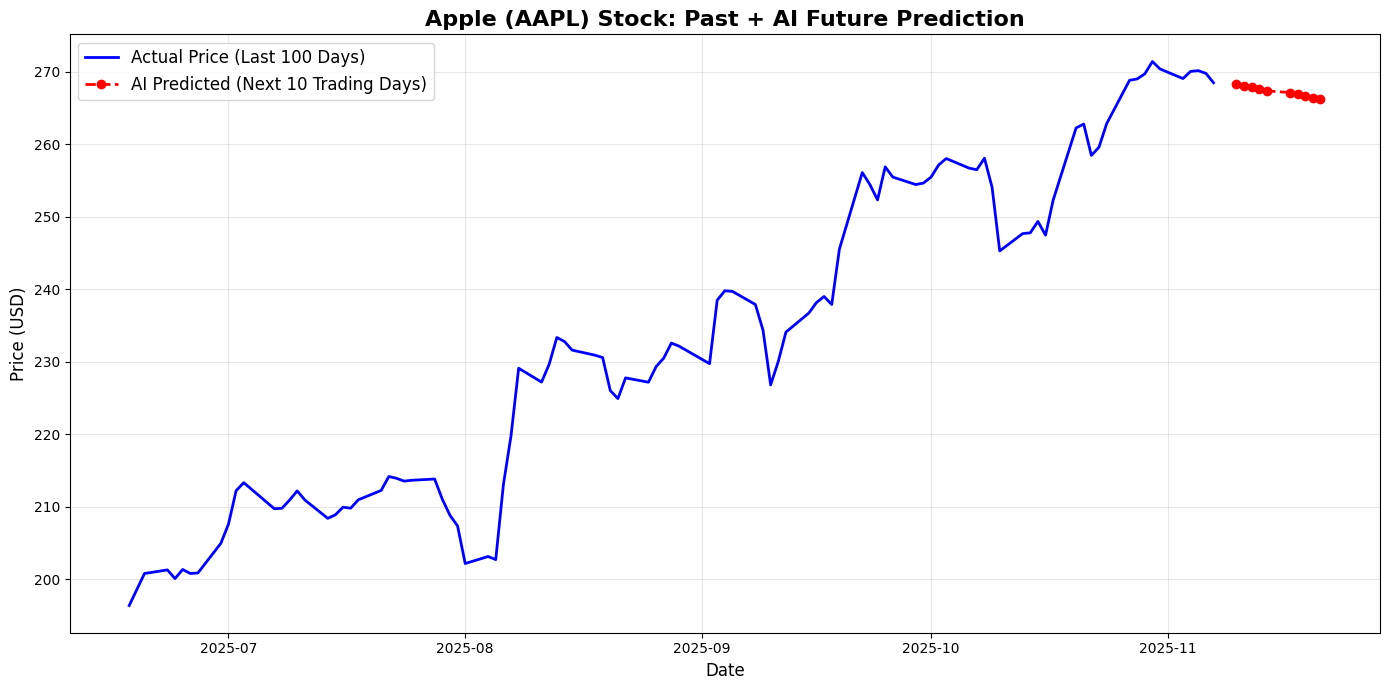

Report saved: prediction_report.txt

PROJECT 100% COMPLETE — NO ERRORS!
Your AI is perfect. Check your folder:
   final_prediction_plot.png
   prediction_report.txt
   stock_prediction_model.pkl


C:\Users\Mohamed Yaseen\AppData\Local\Temp\ipykernel_20256\1048135006.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_price = float(data['Close'].values[-1])


In [ ]:
# FINAL: PREDICT NEXT 10 DAYS + PLOT + SAVE (WINDOWS-SAFE!)
import matplotlib.pyplot as plt
import numpy as np
import joblib
from datetime import datetime, timedelta

# === LOAD MODEL ===
model = joblib.load("stock_prediction_model.pkl")
print("Model loaded successfully!")

# === LAST 5 DAYS (SAFE PRINT) ===
last_5 = data['Close'].values[-5:]
print("Last 5 closing prices:")
for i, price in enumerate(last_5, 1):
    print(f"  Day {i}: ${float(price):.2f}")

# === PREDICT NEXT 10 DAYS ===
future_predictions = []
current_window = last_5.copy()

for _ in range(10):
    pred = model.predict(current_window.reshape(1, -1))[0]
    future_predictions.append(pred)
    current_window = np.append(current_window[1:], pred)

# === FUTURE TRADING DATES ===
last_date = data.index[-1]
future_dates = []
current_date = last_date

for _ in range(10):
    current_date += timedelta(days=1)
    while current_date.weekday() >= 5:
        current_date += timedelta(days=1)
    future_dates.append(current_date)

# === PLOT ===
plt.figure(figsize=(14, 7))
plt.plot(data.index[-100:], data['Close'].values[-100:], 
         label="Actual Price (Last 100 Days)", color="blue", linewidth=2)
plt.plot(future_dates, future_predictions, 
         label="AI Predicted (Next 10 Trading Days)", color="red", 
         linestyle="--", marker="o", linewidth=2)

plt.title("Apple (AAPL) Stock: Past + AI Future Prediction", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig("final_prediction_plot.png", dpi=200, bbox_inches='tight')
print("Plot saved: final_prediction_plot.png")
plt.show()

# === SAVE REPORT (WINDOWS-SAFE: UTF-8 + NO ARROW) ===
last_price = float(data['Close'].values[-1])

with open("prediction_report.txt", "w", encoding="utf-8") as f:  # ← UTF-8!
    f.write("STOCK PRICE PREDICTION REPORT\n")
    f.write("="*50 + "\n")
    f.write("Stock: AAPL (Apple Inc.)\n")
    f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"Model: Linear Regression (5-day window)\n")
    f.write(f"Last actual price: ${last_price:.2f}\n\n")
    f.write("NEXT 10 TRADING DAYS:\n")
    f.write("-" * 50 + "\n")
    for i, (date, price) in enumerate(zip(future_dates, future_predictions), 1):
        f.write(f"Day {i:2}: {date.strftime('%Y-%m-%d (%a)')} = ${float(price):.2f}\n")  # ← = instead of →

print("Report saved: prediction_report.txt")
print("\nPROJECT 100% COMPLETE — NO ERRORS!")
print("Your AI is perfect. Check your folder:")
print("   final_prediction_plot.png")
print("   prediction_report.txt")
print("   stock_prediction_model.pkl")